In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

import ipywidgets as widgets
from IPython import display

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib notebook
%matplotlib inline

In [3]:
import sys
sys.path.append('/h/ashlie/jupyter_helpers')
import plot_helper as ph

import os

In [8]:
# time ms in msec, latency us in nsec.
base_path = '/scratch/ashlie/fio_devs/write/q128'
files = [
    'bs512/_lat.1.log',
    'bs4096/_lat.1.log',
    'bs8192/_lat.1.log',
]
devs = [
    'spdk',
    'spdk_bdev',
    'libaio',
    'sync_nvme',
    'sync_ramdisk',
]

In [9]:
allpaths = {}

for dev in devs:
    bp = os.path.join(base_path, dev)
    lat_files = []
    for f in files:
        lat_files.append(os.path.join(bp, f))
    allpaths[dev] = lat_files

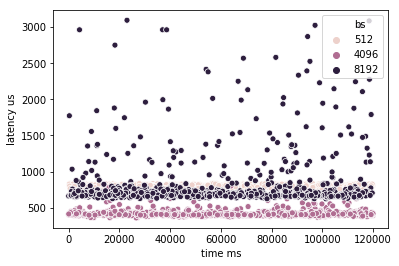

In [10]:
sns.scatterplot(x='time ms', y='latency us', data=ph.plot_quick_prepare(allpaths['spdk']), hue='bs', legend='full')

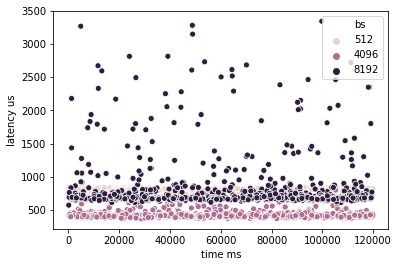

In [7]:
sns.scatterplot(x='time ms', y='latency us', data=ph.plot_quick_prepare(allpaths['spdk_bdev']), hue='bs', legend='full')

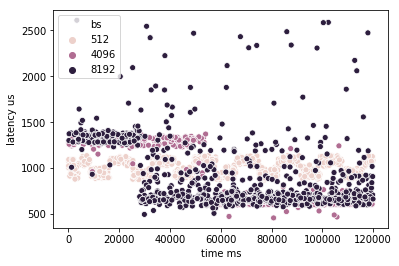

In [8]:
sns.scatterplot(x='time ms', y='latency us', data=ph.plot_quick_prepare(allpaths['libaio']), hue='bs', legend='full')

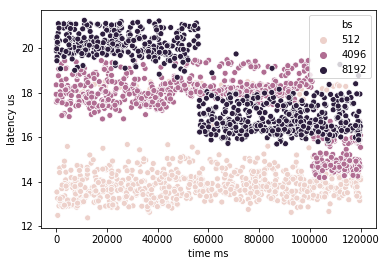

In [9]:
sns.scatterplot(x='time ms', y='latency us', data=ph.plot_quick_prepare(allpaths['sync_nvme']), hue='bs', legend='full')

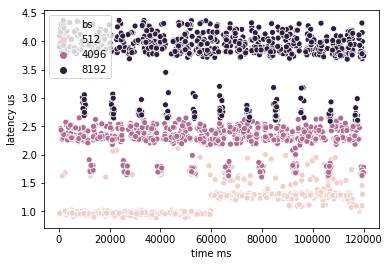

In [10]:
sns.scatterplot(x='time ms', y='latency us', data=ph.plot_quick_prepare(allpaths['sync_ramdisk']), hue='bs', legend='full')

In [7]:
spdkdfs = ph.read_files(allpaths['spdk'])
min_by_bs = ph.min_by_bs(spdkdfs)
min_by_bs

{512: 40.366, 4096: 52.047, 8192: 71.764}